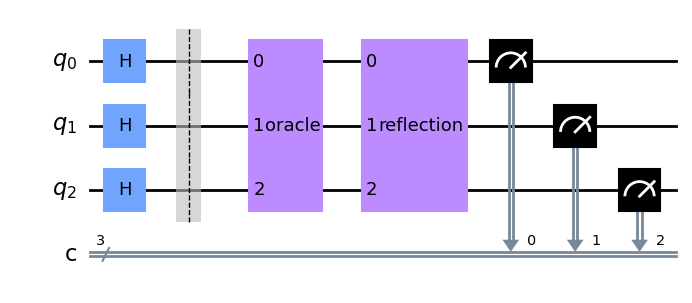

In [51]:
from grover import GroverCircuit
number = [7, 3, 5]
grover_circ = GroverCircuit(number, 1)
grover_circ.draw(output='mpl')

In [58]:
# Run in a Simulator
from qiskit import Aer, execute
grover_circ = GroverCircuit(number, 1)
backend = Aer.get_backend('qasm_simulator')
job = execute(grover_circ, backend, shots=1000)
result = job.result()
simulated_counts = result.get_counts()
print(simulated_counts)

{'100': 33, '001': 37, '010': 34, '000': 34, '110': 25, '101': 292, '111': 285, '011': 260}


In [54]:
# Run on a real quantum computer, be sure to set up your IBMQ account, learn more here: https://quantum-computing.ibm.com/, \
    # this however doesn't work as intended due to noise in the quantum computer.
from qiskit_ibm_provider import IBMProvider
grover_circ = GroverCircuit(number, 1)
provider = IBMProvider()
backend = provider.get_backend('ibmq_belem')
job = execute(grover_circ, backend, shots=1000)
result = job.result()
real_counts = result.get_counts()
print(real_counts)

{'000': 114, '001': 129, '010': 124, '011': 194, '100': 115, '101': 99, '110': 102, '111': 123}


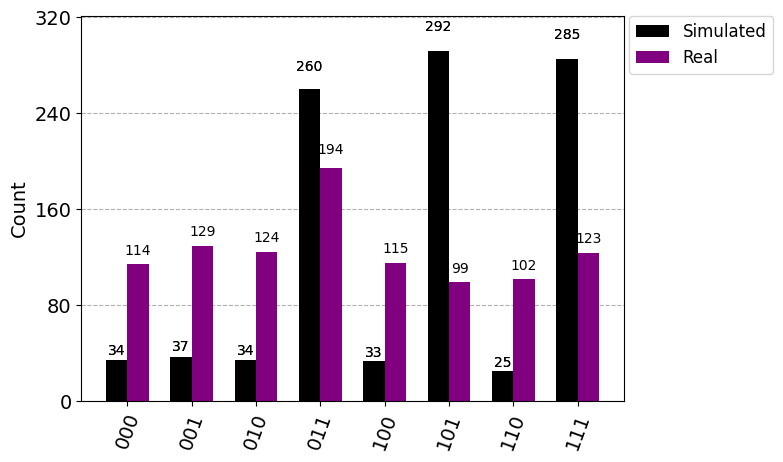

In [59]:
# Plot the results
from qiskit.visualization import plot_histogram
plot_histogram([simulated_counts, real_counts], legend=['Simulated', 'Real'], color=['black', 'purple'])